In [1]:
import pandas as pd

In [2]:
ddf= pd.read_csv('C:/Users/maria/OneDrive/Escritorio/pontia/Proyecto/Definitivo/DDF.csv',sep='|')

In [3]:
ddf.head()

,monto,es_fraude,balance_prev_or,balance_prev_des,hora,tipo_binario
0,181.00,1,181.0,0.0,7,1
1,181.00,1,181.0,21182.0,7,0
2,229133.94,0,15325.0,5083.0,7,0
3,215310.30,0,705.0,22425.0,7,1
4,311685.89,0,10835.0,6267.0,7,1


In [4]:
ddf.shape

(2770360, 6)

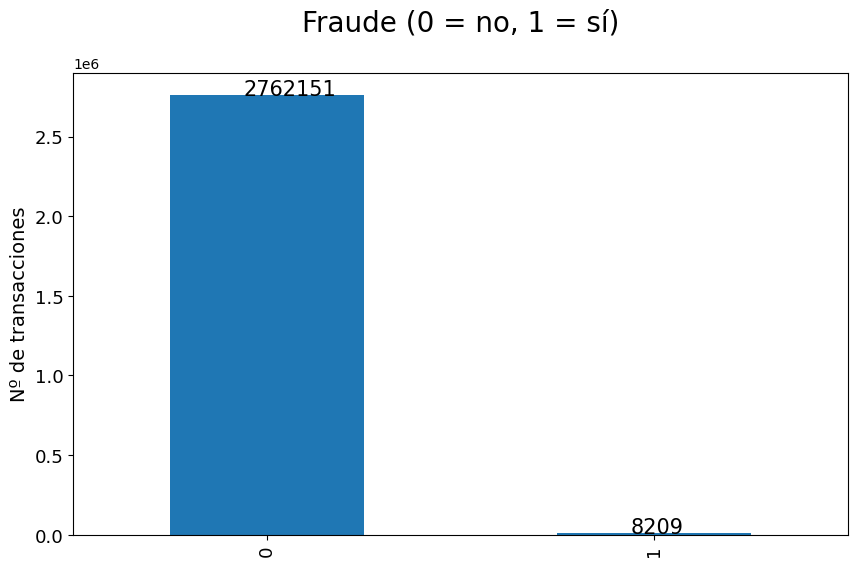

In [5]:
ax = ddf['es_fraude'].value_counts().plot(kind='bar', figsize=(10,6), fontsize=13)
ax.set_title('Fraude (0 = no, 1 = sí)', size=20, pad=30)
ax.set_ylabel('Nº de transacciones', fontsize=14)

for i in ax.patches:
    ax.text(i.get_x() + 0.19, i.get_height() + 700, str(round(i.get_height(),2)), fontsize=15)

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set(rc={'figure.figsize':(14,12)})

# Para suprimir los warnings de scikitlearn por convergencia prematura
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)
import pandas as pd
from sklearn.preprocessing import RobustScaler

In [6]:
X = ddf[['monto','balance_prev_or','balance_prev_des', 'hora','tipo_binario']]
y = ddf[['es_fraude']]

In [7]:
y.value_counts()

es_fraude
0            2762151
1               8209
dtype: int64

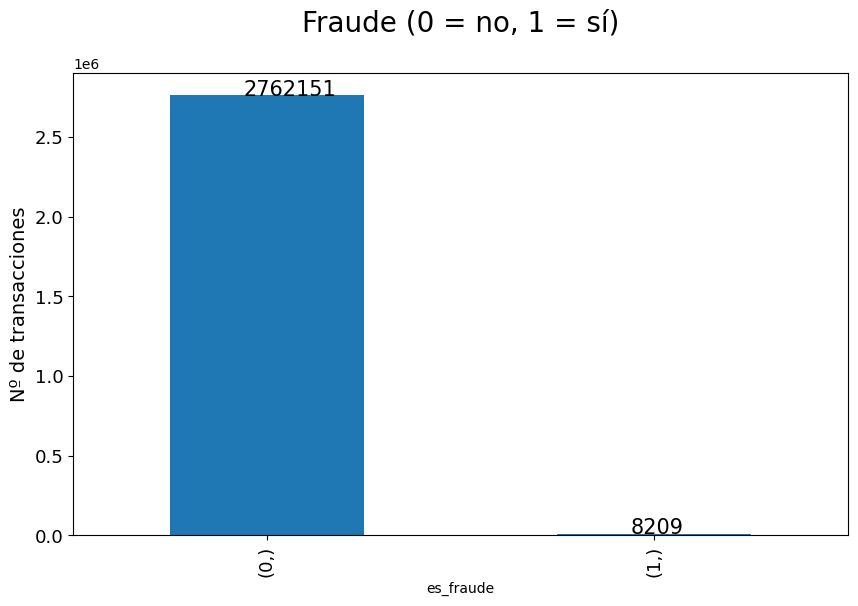

In [8]:
ax = y.value_counts().plot(kind='bar', figsize=(10,6), fontsize=13)
ax.set_title('Fraude (0 = no, 1 = sí)', size=20, pad=30)
ax.set_ylabel('Nº de transacciones', fontsize=14)

for i in ax.patches:
    ax.text(i.get_x() + 0.19, i.get_height() + 700, str(round(i.get_height(),2)), fontsize=15)

In [9]:
from imblearn.over_sampling import SMOTE
'''generar muestras sintéticas adicionales de la clase minoritaria para equilibrar la distribución de clases en 
el conjunto de datos.'''
smote = SMOTE(sampling_strategy='minority') 
'''actualiza Xe ycon las muestras sintéticas generadas para abordar el problema de desequilibrio de clases en el
conjunto de datos.'''
X, y = smote.fit_resample(X, y)

In [10]:
y.value_counts()

es_fraude
0            2762151
1            2762151
dtype: int64

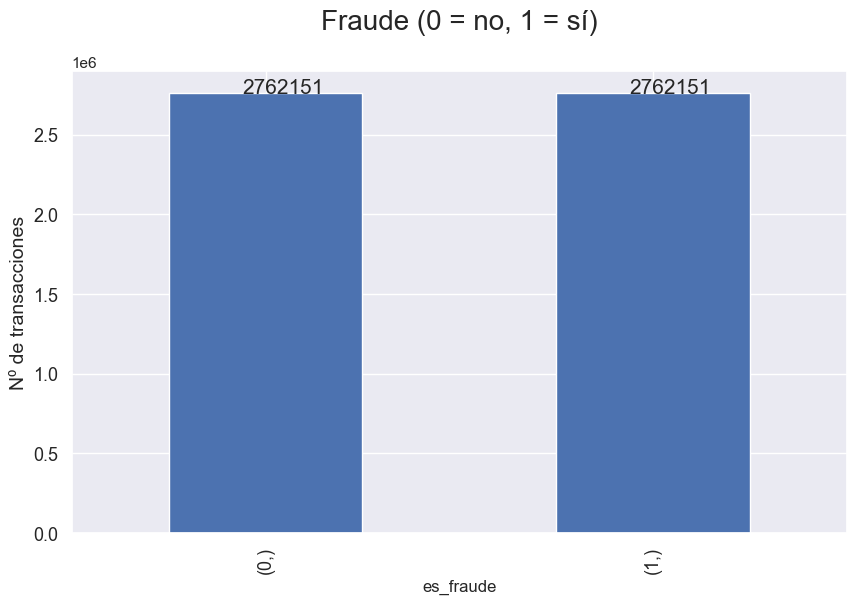

In [11]:
ax = y.value_counts().plot(kind='bar', figsize=(10,6), fontsize=13)
ax.set_title('Fraude (0 = no, 1 = sí)', size=20, pad=30)
ax.set_ylabel('Nº de transacciones', fontsize=14)

for i in ax.patches:
    ax.text(i.get_x() + 0.19, i.get_height() + 700, str(round(i.get_height(),2)), fontsize=15)

In [13]:
from sklearn.model_selection import train_test_split

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3867011, 5)
(3867011, 1)
(1657291, 5)
(1657291, 1)


In [14]:
mean = X_train.mean(axis=0)

In [15]:
median = X_train.median(axis=0)

In [16]:
pd.concat([mean, median, mean-median], axis=1, keys=["Media", "Mediana", "Diferencia"])

,Media,Mediana,Diferencia
monto,8.885760e+05,232862.900000,655713.059270
balance_prev_or,8.440278e+05,65326.210317,778701.598032
balance_prev_des,1.115666e+06,134027.987066,981638.133511
hora,1.189829e+01,13.000000,-1.101707
tipo_binario,2.846873e-01,0.000000,0.284687


In [17]:
#TODO
#Obtener 1.5 el rango intercuartilico
iqrx15 = (X_train.quantile(.75) - X_train.quantile(.25))*1.5
#Obtener los valores maximos
maxs = X_train.max()
#Obtener los valores minimos
mins = X_train.min()
#Definir un limite superior igual a la mediana mas 1.5 veces el rango intercuartilico
sup = median + iqrx15
#Definir un limite inferior igual a la mediana menos 1.5 veces el rango intercuartilico
inf = median - iqrx15
#Comprobar si los valores maximos estan mas alla del limite superior
out_sup = maxs > inf
#Comprobar si los valores minimos estan mas alla del limite inferior
out_inf = maxs < inf
#Mostramos para que variables existen valores atipicos
pd.concat([out_sup, out_inf], axis=1, keys=["Outlier Sup", "Outlier Inf"])

,Outlier Sup,Outlier Inf
monto,True,False
balance_prev_or,True,False
balance_prev_des,True,False
hora,True,False
tipo_binario,True,False


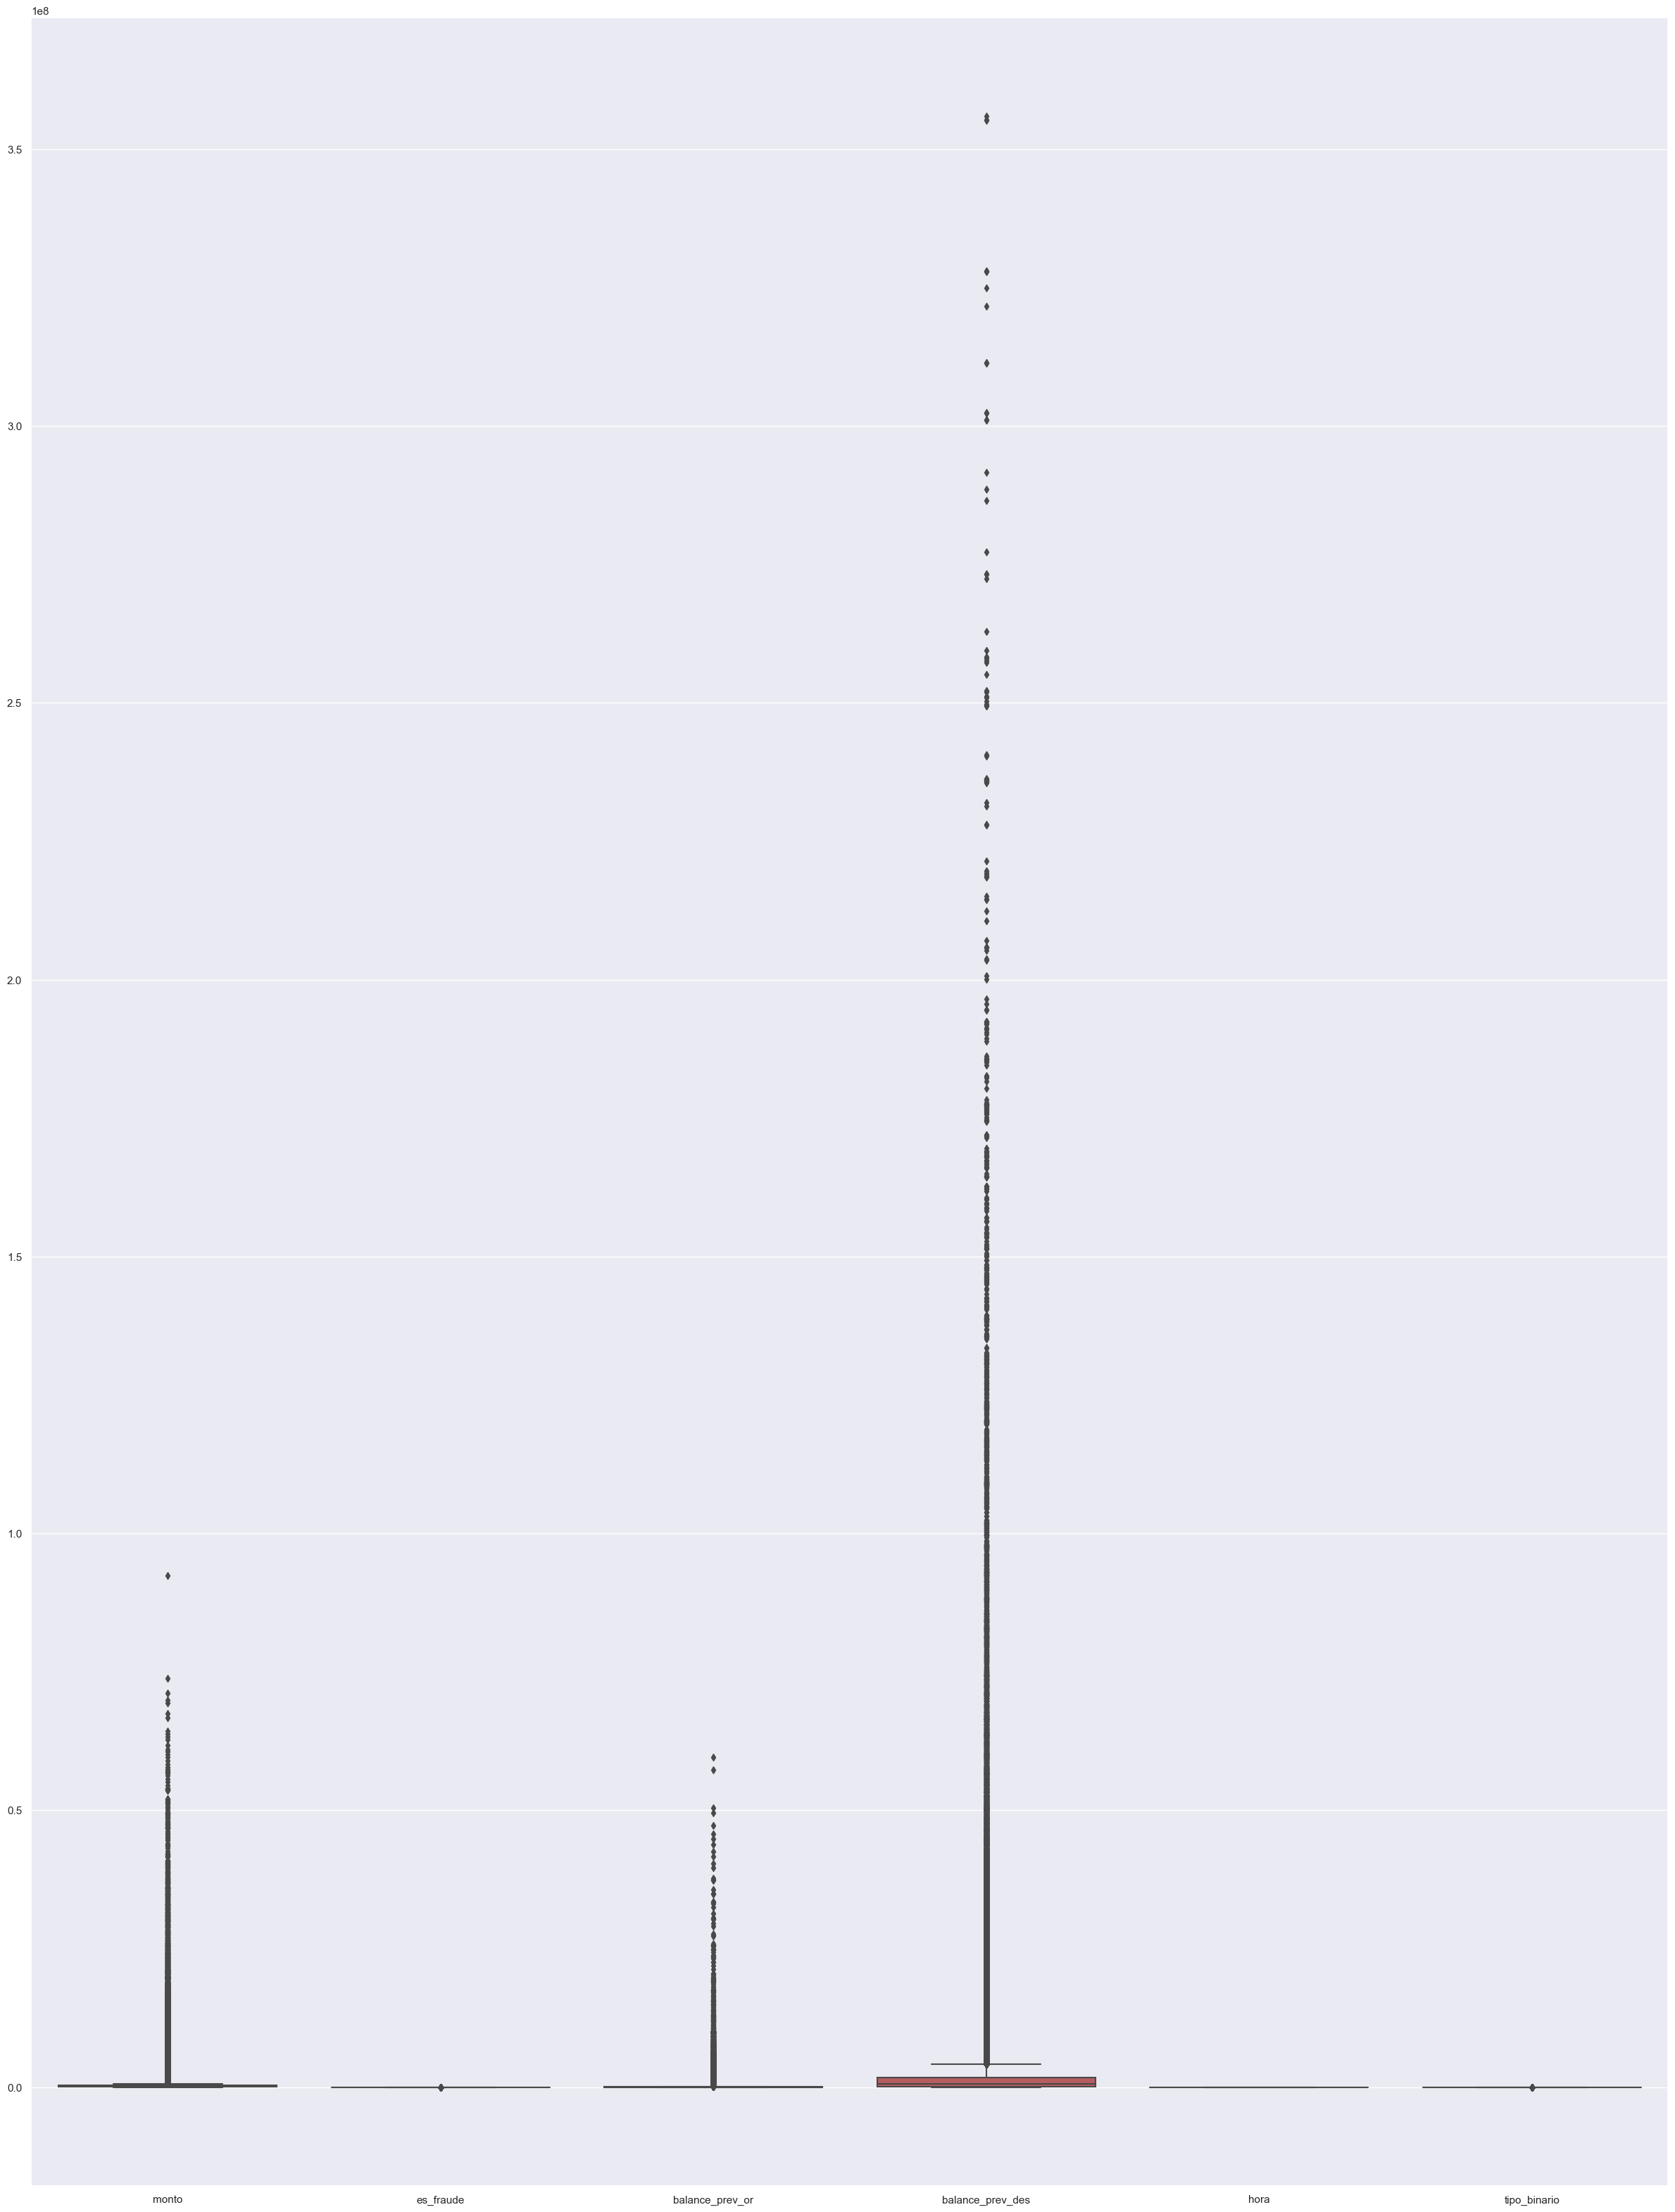

In [18]:
plt.figure(figsize = (30,40))
sns.boxplot(data = ddf)
plt.show()

In [19]:
import pandas as pd
from sklearn.preprocessing import RobustScaler

# Normalizar los datos
scaler = RobustScaler()  # Definir el modelo de normalización
X_train = pd.DataFrame(scaler.fit_transform(X_train))  # Entrenar y normalizar los datos de entrenamiento, ajustamos parametros
X_test = pd.DataFrame(scaler.transform(X_test))  # Normalizar los datos de prueba

# Comprobar el resultado de la normalización
result = pd.concat([X_train.median(), X_test.median(),
                    (X_train.quantile(0.75) - X_train.quantile(0.25)),
                    (X_test.quantile(0.75) - X_test.quantile(0.25))],
                   axis=1,
                   keys=["Train median", "Test median", "Train iqr", "Test iqr"])
print(result)

   Train median  Test median  Train iqr  Test iqr
0           0.0     0.000547        1.0  1.004077
1           0.0     0.000282        1.0  1.008211
2           0.0    -0.000505        1.0  1.001099
3           0.0     0.000000        1.0  1.000000
4           0.0     0.000000        1.0  1.000000


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [21]:
#definir y entrenar el modelo de regresion logistica
l_reg = LogisticRegression().fit(X_train, y_train)

C:\Users\maria\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [22]:
# obtener las predicciones para el conjunto de datos de testeo
y_est = l_reg.predict(X_test)

In [23]:
precision = precision_score(y_test, y_est)
recall = recall_score(y_test, y_est)
print('precision: ' + str(precision))
print('recall: ' + str(recall))

precision: 0.8981873315097125
recall: 0.8206779060220133


Confusion matrix
[[750727  77157]
 [148731 680676]]
Normalized confusion matrix
[[0.90680216 0.09319784]
 [0.17932209 0.82067791]]


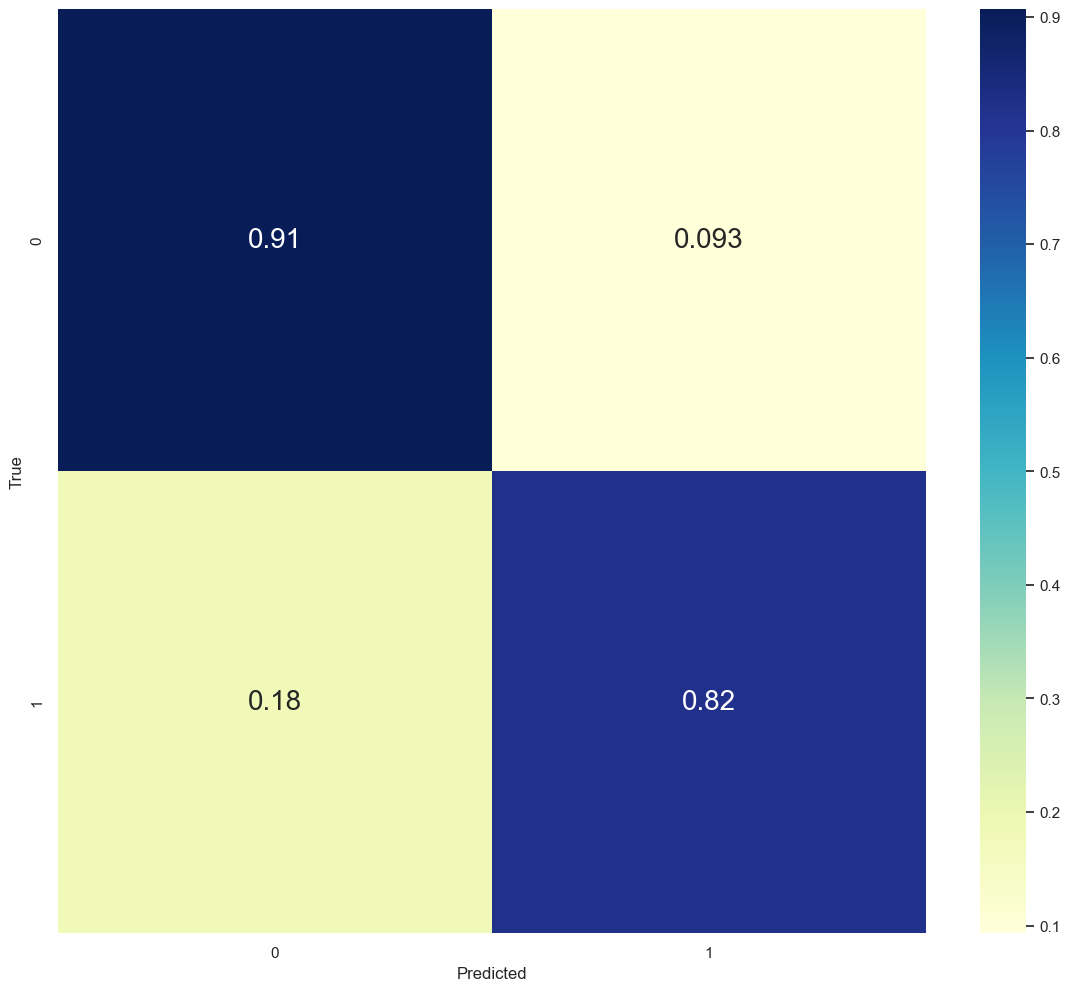

In [24]:
from sklearn.metrics import confusion_matrix

CM = confusion_matrix(y_test, y_est)
print('Confusion matrix')
print(CM)
CM_norm = CM.astype('float') / CM.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(CM_norm)
g = sns.heatmap(CM_norm, annot=True, cmap="YlGnBu", annot_kws={"size": 20}) \
       .set(ylabel='True', xlabel='Predicted')

In [31]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(30)

#X = ddf[['monto','balance_prev_or','balance_prev_des', 'hora','tipo_binario']]
#y = ddf[['es_fraude']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30)

import pandas as pd
from sklearn.preprocessing import RobustScaler

# Normalizar los datos
scaler = RobustScaler()  # Definir el modelo de normalización
X_train = pd.DataFrame(scaler.fit_transform(X_train))  # Entrenar y normalizar los datos de entrenamiento, ajustamos parametros
X_test = pd.DataFrame(scaler.transform(X_test)) 

clf_tree = DecisionTreeClassifier(criterion= 'gini')
clf_tree.fit(X_train, y_train)


#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)


#arbol=DecisionTreeClassifier()
#arbol.fit(X_train,y_train)
y_est = clf_tree.predict(X_test)

#print(arbol.score(X_test,y_test))
#print(arbol.score(X_train,y_train))

In [32]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [33]:
precision = precision_score(y_test, y_est)
recall = recall_score(y_test, y_est)
print('precision: ' + str(precision))
print('recall: ' + str(recall))

precision: 0.9964999181267398
recall: 0.9988498644698636


Confusion matrix
[[825786   2907]
 [   953 827645]]
Normalized confusion matrix
[[0.99649207 0.00350793]
 [0.00115014 0.99884986]]


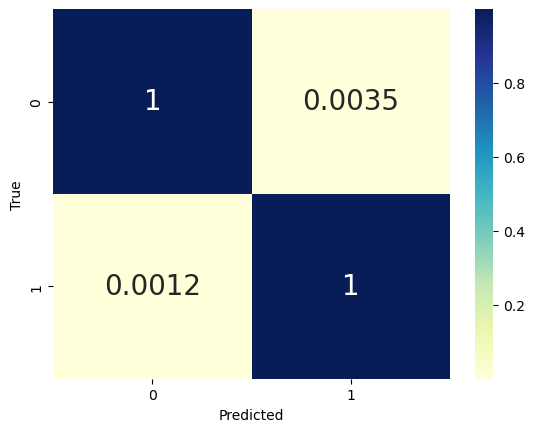

In [34]:
from sklearn.metrics import confusion_matrix

CM = confusion_matrix(y_test, y_est)
print('Confusion matrix')
print(CM)
CM_norm = CM.astype('float') / CM.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(CM_norm)
g = sns.heatmap(CM_norm, annot=True, cmap="YlGnBu", annot_kws={"size": 20}) \
       .set(ylabel='True', xlabel='Predicted')

In [22]:
ddf.shape

(2770360, 6)

In [35]:
plt.figure(figsize=(15, 10))
plot_tree(clf_tree, filled=True, feature_names=iris.feature_names)
plt.show()

NameError: name 'iris' is not defined

<Figure size 1500x1000 with 0 Axes>